In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
df = pd.read_csv("/content/temps.csv")
df

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2019,1,1,Fri,45,45,45.6,45,29
1,2019,1,2,Sat,44,45,45.7,44,61
2,2019,1,3,Sun,45,44,45.8,41,56
3,2019,1,4,Mon,44,41,45.9,40,53
4,2019,1,5,Tues,41,40,46.0,44,41
...,...,...,...,...,...,...,...,...,...
343,2019,12,27,Tues,42,42,45.2,47,47
344,2019,12,28,Wed,42,47,45.3,48,58
345,2019,12,29,Thurs,47,48,45.3,48,65
346,2019,12,30,Fri,48,48,45.4,57,42


In [5]:
df.columns

Index(['year', 'month', 'day', 'week', 'temp_2', 'temp_1', 'average', 'actual',
       'friend'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     348 non-null    int64  
 1   month    348 non-null    int64  
 2   day      348 non-null    int64  
 3   week     348 non-null    object 
 4   temp_2   348 non-null    int64  
 5   temp_1   348 non-null    int64  
 6   average  348 non-null    float64
 7   actual   348 non-null    int64  
 8   friend   348 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 24.6+ KB


In [7]:
df.isnull().sum()

,0
year,0
month,0
day,0
week,0
temp_2,0
temp_1,0
average,0
actual,0
friend,0


In [8]:
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2019,1,1,Fri,45,45,45.6,45,29
1,2019,1,2,Sat,44,45,45.7,44,61
2,2019,1,3,Sun,45,44,45.8,41,56
3,2019,1,4,Mon,44,41,45.9,40,53
4,2019,1,5,Tues,41,40,46.0,44,41


In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['week'] = le.fit_transform(df['week'])

In [10]:
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2019,1,1,0,45,45,45.6,45,29
1,2019,1,2,2,44,45,45.7,44,61
2,2019,1,3,3,45,44,45.8,41,56
3,2019,1,4,1,44,41,45.9,40,53
4,2019,1,5,5,41,40,46.0,44,41


In [12]:
df.shape

(348, 9)

In [13]:
y = df['actual']

In [14]:
X = df.drop('actual', axis=1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (278, 8)
Training Labels Shape: (278,)
Testing Features Shape: (70, 8)
Testing Labels Shape: (70,)


In [20]:
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

In [22]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [23]:
predictions = rf.predict(X_test)

errors = abs(predictions - y_test)

print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 3.84 degrees.


In [24]:
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 93.92 %.


In [29]:
pip install pydot

In [30]:
feature_list = X_train.columns

In [32]:
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png')

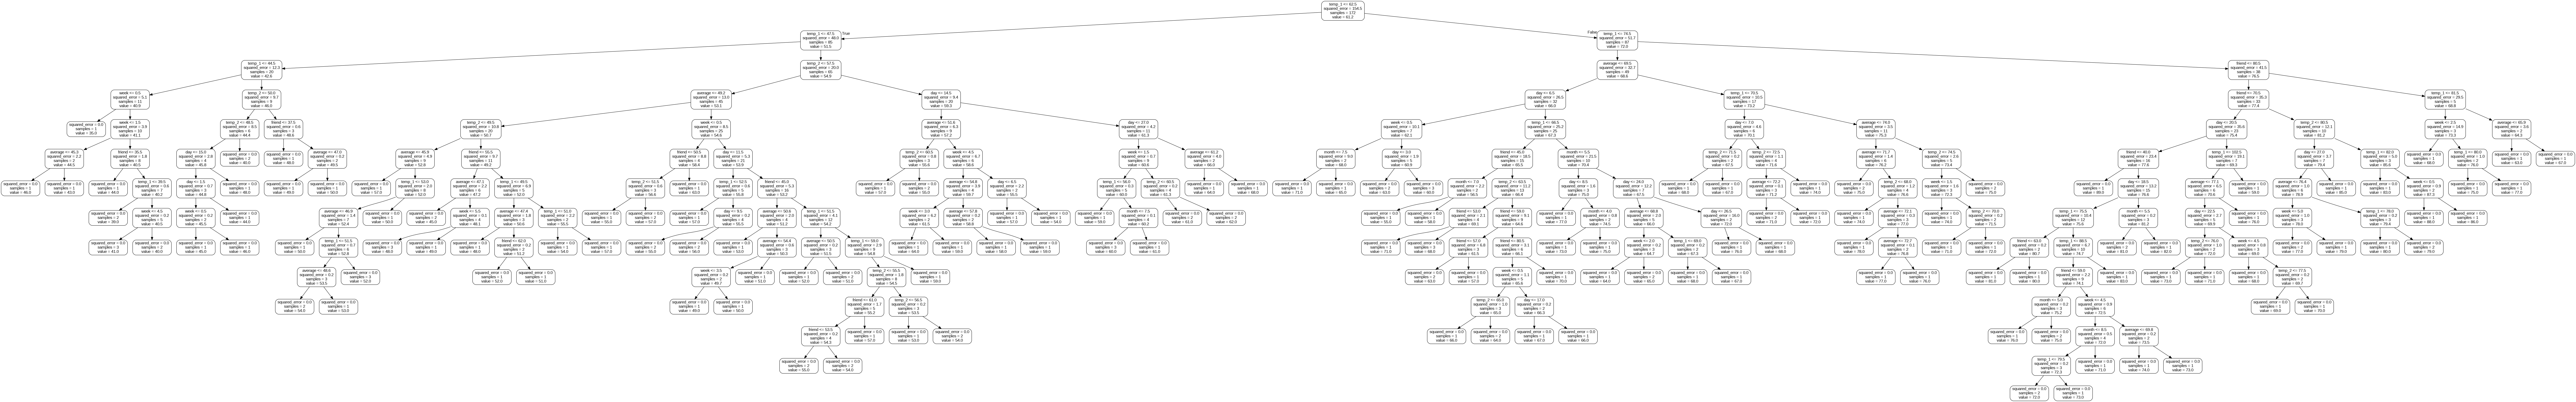

In [35]:
from IPython.display import Image
Image(filename='tree.png')

In [36]:
print('The depth of this tree is:', tree.tree_.max_depth)

The depth of this tree is: 13
